In [1]:
import splat
import wisps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
from tqdm import tqdm


%matplotlib inline

In [2]:
#get data 
alld=wisps.get_big_file()
alld=wisps.Annotator.reformat_table(alld)
hst3d_phot=pd.read_csv(wisps.OUTPUT_FILES+'/hst3d_photometry_all.csv')

hst3d_phot.grism_id=hst3d_phot.grism_id.str.lower()
#do a left merge
merged=alld.merge(hst3d_phot[['grism_id', 'flux_radius']], on='grism_id', how='left')


#determine stars based on where they fall based on UCDs
ucds=pd.read_pickle('~/research/wisps/libraries/real_ucds.pkl')
hucds=ucds[~ucds.grism_id.str.lower().str.startswith('par')]
hucds['flux_radius']=hst3d_phot[hst3d_phot.grism_id.str.lower().isin(ucds.grism_id.str.lower().values)].flux_radius.values

In [3]:
#ensure things are saved
assert (merged.shape[0] == alld.shape[0])

Text(0.5, 0, 'F160W')

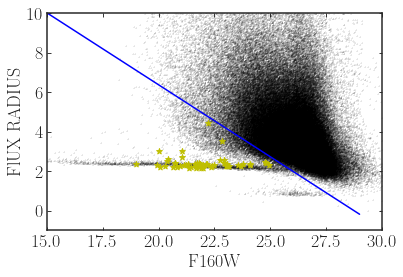

In [4]:
fig, ax=plt.subplots()
plt.scatter(hst3d_phot['Faper160_mag'],  hst3d_phot['flux_radius'], s=1., alpha=0.1, c='k', marker='+')
plt.scatter( hucds['F160W'],  hucds['flux_radius'], c='y', marker='*')

line_cut=np.poly1d(np.polyfit([ 15.0, 26.0], [10.0, 2.0], 1))

plt.plot(np.arange(15, 30.0),line_cut(np.arange(15.0, 30.0)), c='b')
plt.ylim([-1, 10])
plt.xlim([15, 30])



plt.ylabel('FlUX RADIUS')
plt.xlabel('F160W')

In [5]:
bools0= np.logical_and(merged.class_star !=0, merged.grism_id.str.startswith('par')) 
bools1= np.logical_and((~merged.grism_id.str.startswith('par')), (merged.flux_radius_x <  line_cut(merged.F160)))
bools2= merged.flux_radius_x < 1.5
merged['mstar_flag']= np.logical_or.reduce([bools0, bools1, bools2]).astype(int)

In [6]:
merged['flux_radius']=merged['flux_radius_x']
merg=merged.drop(['flux_radius_x', 'flux_radius_y'], axis=1)

In [7]:
#merg.to_hdf(wisps.LIBRARIES+'/master_dataset.h5', key='new')

In [8]:
#merged.mstar_flag

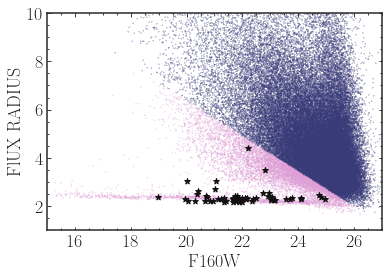

In [9]:
fig, ax=plt.subplots()
plt.scatter(merged['F160'],  merged['flux_radius'], s=1., alpha=0.3,
            c=merged.mstar_flag, marker='+', cmap='tab20b')
plt.scatter( hucds['F160W'],  hucds['flux_radius'], c='#111111', marker='*')

#line_cut=np.poly1d(np.polyfit([ 15.0, 26.0], [10.0, 2.0], 1))

#plt.plot(np.arange(15, 30.0),line_cut(np.arange(15.0, 30.0)), c='b')
plt.ylim([1, 10])
plt.xlim([15, 27])


plt.ylabel('FlUX RADIUS')
plt.xlabel('F160W')
plt.minorticks_on()
plt.savefig(wisps.OUTPUT_FIGURES+ '/point_sources_cut.pdf', dpi=50000, rasterized=True)

In [10]:
line_cut

poly1d([-0.72727273, 20.90909091])

In [11]:
#jhkl

In [12]:
stars=(merged[merged.mstar_flag >0]).reset_index(drop=True)
stars=stars[stars.snr1>=3.0]
cutphot=merged[((merged.snr1>=3.0))]
wispsph=alld[alld.grism_id.str.startswith('par')]
hst3d=alld[~ alld.grism_id.str.startswith('par')]

starswisp=stars[stars.grism_id.str.startswith('par')]
starshst3d=stars[(~ stars.grism_id.str.startswith('par'))]


In [13]:
#https://rmflight.github.io/post/finding-modes-using-kernel-density-estimates/

In [14]:
mag_limits={'wisps':{'F110W':[22.5, 18.0], 'F140W':[22., 16.0], 'F160W':[22.0, 16.0] }, 
            'hst3d':{'F140W':[23., 16.0], 'F160W':[23., 16.0] }}

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


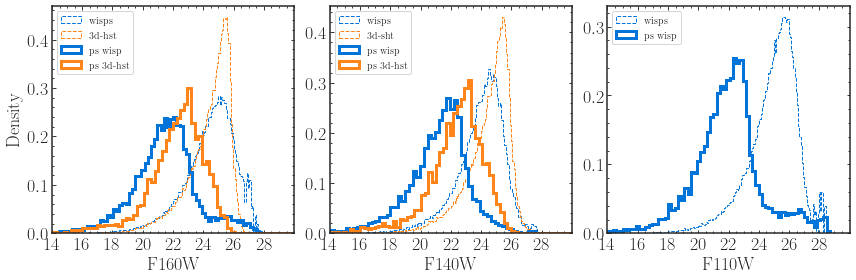

In [15]:
fig, ax=plt.subplots(ncols=3, figsize=(12, 4))
##top
h=ax[0].hist(wispsph.F160.dropna().values, label='wisps', bins='auto', color='#0074D9', density=True, histtype='step', linestyle='--')
h=ax[2].hist(wispsph.F110.dropna().values,  label='wisps', bins='auto', color='#0074D9', density=True, histtype='step', linestyle='--')
h=ax[1].hist(wispsph.F140.replace(np.inf, np.nan).dropna().values,   label='wisps', bins='auto', color='#0074D9', density=True, histtype='step' , linestyle='--')
#h=cutphot.F140.replace(np.inf, np.nan).dropna().plot(kind='hist', ax=ax[0][2], bins='auto',label='F140', color='#7FDBFF', density=True)

h=ax[0].hist(hst3d.F160.dropna().values,  label='3d-hst', bins='auto', color='#FF851B', density=True, histtype='step', linestyle='--')
#h=ax[2].hist(hst3d.F110.dropna().values,  label='3d-hst', bins='auto', color='#2ECC40', density=True, histtype='step',  linestyle='--')
h=ax[1].hist(hst3d.F140.replace(np.inf, np.nan).dropna().values,  label='3d-sht', bins='auto', color='#FF851B', density=True, histtype='step',  linestyle='--')

h=ax[0].hist(starswisp.F160.dropna().values,  label='ps wisp', bins='auto', color='#0074D9', density=True, linewidth=3, histtype='step')
h=ax[2].hist(starswisp.F110.dropna().values,   label='ps wisp', bins='auto', color='#0074D9', density=True, linewidth=3,histtype='step')
h=ax[1].hist(starswisp.F140.replace(np.inf, np.nan).dropna().values,   label='ps wisp', bins='auto',  color='#0074D9', linewidth=3,density=True, histtype='step')

h=ax[0].hist(starshst3d.F160.dropna().values,  label='ps 3d-hst', bins='auto', color='#FF851B', linewidth=3,density=True, histtype='step')
#h=ax[2].hist(starshst3d.F110.dropna().values,   label='ps 3d-hst', bins='auto', color='#111111', density=True, histtype='step')
h=ax[1].hist(starshst3d.F140.replace(np.inf, np.nan).dropna().values,   label='ps 3d-hst', bins='auto', linewidth=3, color='#FF851B', density=True, histtype='step')


#bayesian blocks
#H2 = ax[0][0].hist(cutphot.F160.replace(np.inf, np.nan).dropna(), bins=edgesf160, color='#111111',  density=True, lw =2, histtype='step')
#H2 = ax[0][1].hist(cutphot.F110.replace(np.inf, np.nan).dropna(), bins=edges110, color='#111111',  density=True, lw =2, histtype='step')
#H2 =ax[0][2].hist(cutphot.F140.replace(np.inf, np.nan).dropna(), bins=edges140, color='#111111',  density=True, lw =2, histtype='step')

#ax[0].axvline(mag_limits['wisps']['F140W'][0], color='#B10DC9', linestyle='-')
#ax[0].axvline(mag_limits['hst3d']['F140W'][0], color='#111111', linestyle='-')

#ax[2].axvline(mag_limits['wisps']['F110W'][0], color='#B10DC9', linestyle='-')
#ax[0][1].axvline(23,  color='#111111')


#ax[1].axvline(mag_limits['wisps']['F160W'][0],color='#B10DC9', linestyle='-')
#ax[1].axvline(mag_limits['hst3d']['F160W'][0], color='#111111', linestyle='-')





#ax[1][0].scatter( cutphot.F160, cutphot.exposure, marker=',', alpha=0.1, s=50)
#sns.kdeplot( cutphot.F160, cutphot.exposure, ax=ax[1][0])
#df=cutphot[['F160', 'exposure']].replace(np.inf, np.nan).dropna()
#ax[1][0].hist2d(df.F160.values, df.exposure.values, cmap=wisps.MYCOLORMAP)

#df=cutphot[['F110', 'exposure']].replace(np.inf, np.nan).dropna()
#ax[1][2].hist2d(df.F110.values, df.exposure.values, cmap=wisps.MYCOLORMAP)

#df=cutphot[['F140', 'exposure']].replace(np.inf, np.nan).dropna()
#ax[1][1].hist2d(df.F140.values, df.exposure.values, cmap=wisps.MYCOLORMAP)

#sns.kdeplot( df.F160, df.exposure, ax=ax[1][0], shade=True)
#ax[1][1].scatter( cutphot.F110, cutphot.exposure, marker=',', alpha=0.1, s=50)
#ax[1][2].scatter( cutphot.F140, cutphot.exposure, marker=',', alpha=0.1, s=50)



ax[0].set_xlabel('F160W', fontsize=18)
ax[2].set_xlabel('F110W', fontsize=18)
ax[1].set_xlabel('F140W', fontsize=18)

#ax[1][0].set_ylabel('Exposure (s)', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
#ax[1][2].set_ylabel('Exposure (s)', fontsize=18)

for a in ax:
    a.set_xticks(np.arange(14, 30, 2.0))
    a.set_xlim([14, 30])
    a.yaxis.set_ticks_position('both')
    a.xaxis.set_ticks_position('both')
    a.xaxis.set_minor_locator
    #a.tick_params(which='major',direction='inout')
    a.tick_params(which='minor', direction='in')
    #ml = MultipleLocator(.5)
    #a.xaxis.set_minor_locator(ml)
    a.minorticks_on()


#ax[0][0].set_ylim([0., 0.35])
#ax[0][1].set_ylim([0., 0.30])
#ax[0][2].set_ylim([0., 0.35])


ax[0].legend(loc='upper left', fontsize=10)
ax[1].legend(loc='upper left', fontsize=10)
ax[2].legend(loc='upper left', fontsize=10)
    
plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/mag_limits_all.pdf', bbox_inches='tight')


In [16]:
ucds=pd.read_pickle('~/research/wisps/libraries/real_ucds.pkl')
ucds['class_star']=alld[alld.grism_id.str.lower().isin(ucds.grism_id.str.lower().values)].class_star.values

In [17]:
wucds=ucds[ucds.grism_id.str.lower().str.startswith('par')]
hucds=ucds[~ucds.grism_id.str.lower().str.startswith('par')]

(0.2, 1.5)

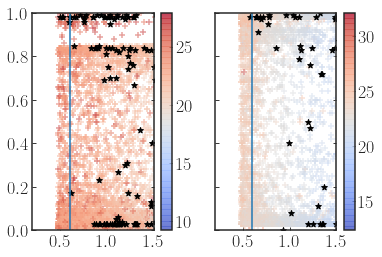

In [18]:
fig, (ax, ax1)=plt.subplots(ncols=2, sharex=True, sharey=True)
cx=ax.scatter(starswisp.snr1.apply(np.log10), starswisp.class_star,
            alpha=.5, marker='+',  c= starswisp.F160, cmap='coolwarm')
        
ax.scatter(wucds.snr1.apply(np.log10), wucds.class_star, marker='*', c='k')
plt.colorbar(cx, ax=ax)
#sns.scatterplot(starswisp.snr1.apply(np.log10), starswisp.snr1.apply(np.log10, s=5, color=".15", ax=ax)
#sns.histplot(x=cutdf.appF140, y=cutdf.snr.apply(np.log10), bins=50, pthresh=.1, cmap="mako")
#sns.kdeplot(starswisp.snr1.apply(np.log10), cutdf.snr.apply(np.log10), levels=5, color="w", linewidths=1)

c=ax1.scatter(starshst3d.snr1.apply(np.log10), starshst3d.class_star, 
            alpha=.5, marker='+', c=starshst3d.F160, cmap='coolwarm')
ax1.scatter(hucds.snr1.apply(np.log10), hucds.class_star, marker='*', c='k')
plt.colorbar(c)
ax.axvline(np.log10(4))
ax1.axvline(np.log10(4))

plt.ylim([0.0, 1.])
#plt.xlabel('')
plt.xlim([0.2, 1.5])

In [19]:
from astropy.io import fits
from astropy.table import Table

In [20]:
scal=fits.open('https://urldefense.com/v3/__http://homepages.spa.umn.edu/*mscarlat/WISPPhotometricCatalog_v1.2.fits__;fg!!Mih3wA!V4jOw3ITlkzp1jvdGyu3fXDBgLCi8r-HtAKdSNKE66P5ojZq6a8aHNcZOde7Y84$')

In [21]:
def grism_id(row): return 'par'+ str(int(row.PAR))+'-'+ str(int(row.OBJ)).zfill(5)
tbl=Table(scal[1].data)
tbl_df=(tbl['RA', 'DEC', 'PAR','OBJ', 'MAG_AUTO_F140W']).to_pandas()
tbl_df['grism_id']=tbl_df.apply(grism_id, axis=1)
#merged=tbl_df.merge(fphot, on='grism_id')
#merged.columns
#plt.plot(merged.F140, merged.MAG_AUTO_F140W)

In [22]:
#tbl.columns

In [23]:
#sean_catalog= pd.read_csv(wisps.OUTPUT_FILES+'/wisps_point_sources.csv')

In [24]:

#import glob
#fileo=glob.glob(wisps.REMOTE_FOLDER+'/wisps/archive.stsci.edu/missions/hlsp/wisp/v6.2/'\
#+'par'+str(32)+'/*'+str('f140')+'*_cat.txt')[0]

In [25]:
#!open '/volumes/burgasserlab/Surveys///wisps/archive.stsci.edu/missions/hlsp/wisp/v6.2/par32/hlsp_wisp_hst_wfc3_par32_f140w_v6.2_cat.txt'

In [26]:
#from astropy.io import ascii
#ascii.read(fileo).to_pandas()

In [27]:
#plt.scatter(sean_catalog.half_light_rad, sean_catalog.mag, marker='+')

In [28]:
#s=ucds.spectra[ucds.class_star ==0 ].values[0]

In [29]:
#plt.plot(s.wave, s.flux)
#plt.xlim([1.1,1.7])
#plt.ylim([0.0, 1.])

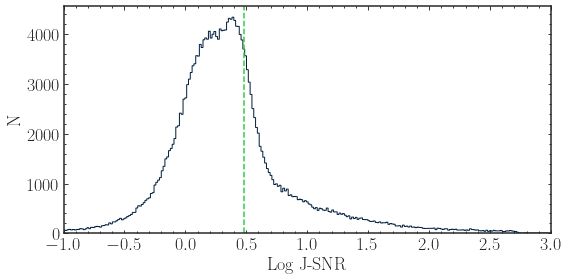

In [30]:
fig, ax1=plt.subplots(figsize=(8, 4), ncols=1, sharey=False)
#h=ax.hist(phot.f_test, bins='auto', color='#001f3f', density=False, histtype='step')

#ax.axvline(.4, color='#2ECC40', linestyle='--')
#ax.set_xlabel('F(x)', fontsize=18)
#ax.set_ylabel('N', fontsize=18)
#ax.minorticks_on()


h=ax1.hist(alld.snr1.apply(np.log10), bins='auto', 
           color='#001f3f', density=False, histtype='step')

ax1.axvline(np.log10(3.), color='#2ECC40', linestyle='--')
ax1.set_xlabel('Log J-SNR', fontsize=18)
ax1.set_ylabel('N', fontsize=18)
ax1.set_xlim([-1., 3.])

ax1.minorticks_on()
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/f_test_snr_distr.pdf')

In [31]:
#MAKE MAGNITUDE LIMIT POLYNOMIALS HERE

In [32]:

def get_max_value(values):
    values=wisps.drop_nan(values)
    if len(values)<1:
        return np.nan
    #if  np.equal.reduce(values):
    #    return  values.mean()
    if len(values)>=1:
        kernel = wisps.kernel_density(values)
        height = kernel.pdf(values)
        mode_value = values[np.argmax(height)]
        return float(mode_value)
def get_polynomials(survey):
    exposure_times=[]
    mags=[]
    df=None
    
    if survey=='wisps': df= wisps.Annotator.reformat_table(starswisp)
    if survey=='hst3d': 
        df= wisps.Annotator.reformat_table(starshst3d)
    
    for g in df.groupby('pointing'):
        if len(g[1]) < 20:
            pass
        else:
            exposure_times.append(np.nanmedian(g[1].exposure_time.values))
            mags.append([get_max_value(g[1].F110.values), 
                         get_max_value(g[1].F140.values), 
                         get_max_value(g[1].F160.values)])
            
    mags=np.vstack(mags)
    if survey=='hst3d': 
        p0=None
    else:
        bools0=np.logical_or.reduce([np.isnan(mags[:, 0]), mags[:,0] <15, mags[:,0] >25])
        _, p0=wisps.fit_with_nsigma_clipping(np.log10(exposure_times)[~bools0], 
                                             mags[:, 0][~bools0], (mags[:, 0]/100)[~bools0], sigma=5, n=1)
        
    bools1=np.logical_or.reduce([np.isnan(mags[:, 1]), mags[:,1] <15, mags[:,1] >25])
    bools2=np.logical_or.reduce([np.isnan(mags[:, 2]), mags[:,2] <15, mags[:,2] >25])
    _, p1=wisps.fit_with_nsigma_clipping(np.log10(exposure_times)[~bools1],
                                         mags[:, 1][~bools1], (mags[:, 1]/10)[~bools1], sigma=5, n=1)
    _, p2=wisps.fit_with_nsigma_clipping(np.log10(exposure_times)[~bools2], 
                                         mags[:, 2][~bools2], (mags[:, 2]/10)[~bools2],   sigma=5, n=1)
    
    return {survey: {"F110":(p0, np.nanstd(mags[:,0])), 
                     "F140": (p1, np.nanstd(mags[:,1])),
                     "F160":(p2, np.nanstd(mags[:,2]))}}


In [33]:
#fit a line to exposure times
wisppol= get_polynomials('wisps')
hst3dpol= get_polynomials('hst3d')

In [34]:
#fit magnitude uncertainty as a functio
stars= (merg[merg.mstar_flag !=0]).reset_index(drop=True)
from scipy.optimize import curve_fit

In [55]:
def func_unc_mag(x, a, c, x0):
    #relationship uncertainty mag with fixed exposure time
    return  x0+ a*np.exp(x*c)

def func_exp_mag(x, b):
    #relationship uncertainty exposure time with fixed mag
    return  b*(x)

def func_third_fit(x, d, e):
    return d*(x**e)

def func_total(x, z, a, c, x0, b):
    return x0+ a*(x**c)+ b*(z)
    

def iterative_fits(x, y, z):
    #do a first pass 
    popt, _ = curve_fit(func_unc_mag, x, y,  bounds=([0.0, 0, 0], [1., 6., 1.]))
    #get residuals 
    yres1= y-func_unc_mag(x,*popt)
    
    #do a second pass
    popt2, _ = curve_fit(func_exp_mag, z, yres1)
    #get reiduals
    yres2= y- (popt[0]+popt2[0]*z)
    
    #do a third pass fixing the second temr
    popt3, _ = curve_fit(func_third_fit, x, yres2, bounds=([0, 0], [1., 7.]))
    
    #return optimal paremetrs
    result={'a':popt3[0], 'b':popt2.flatten()[0], 'c': popt3[1], 's0': popt[0] }
    
    print ('_________________ BEST FITS __________')
    print ('a {} c {} so {} b {}'.format(result['a'], result['c'], result['s0'], result['b']))
    return [result['a'], result['c'], result['s0'], result['b']]
    


In [36]:
#stars

In [37]:
mask=np.logical_or.reduce([np.isnan(stars.F110.values), np.isnan(stars.F110_er.values), 
                           np.abs(stars.F110_er.values) > 1., np.abs(stars.F110_er.values) ==0.0  ])
xdata=stars.F110.values[~mask]
ydata= stars.F110_er.values[~mask]
zdata=stars.exposure_time.apply(np.log10).values[~mask]

In [38]:
res=iterative_fits(xdata, ydata, zdata)

_________________ BEST FITS __________
[1.8738829932090063e-11, 6.999944647432182, 1.5931837134565865e-06, -0.0008004036404463122]


In [39]:
xgrid=np.linspace(xdata.min(), xdata.max(), 1000)
zgrid= np.linspace(zdata.min(), zdata.max(), 1000)
ygrid=func_total(xgrid, zgrid, *res)

In [50]:
%matplotlib inline

Text(0, 0.5, 'MAG UNCERTAINTY')

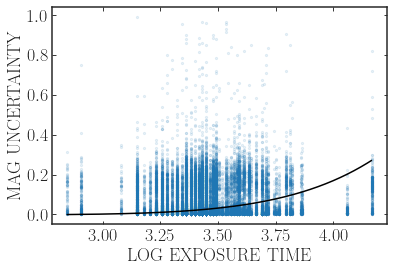

In [51]:
plt.scatter(zdata, ydata, s=5, alpha=0.1)
plt.plot(zgrid, ygrid, c='k')
plt.xlabel('LOG EXPOSURE TIME')
plt.ylabel('MAG UNCERTAINTY')

#plt.yscale('log')

Text(0.5, 0, 'MAG')

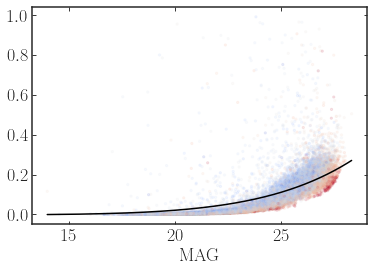

In [52]:
plt.scatter(xdata, ydata, s=5, alpha=0.1, c=zdata, cmap='coolwarm')
plt.plot(xgrid, ygrid,  c='k')
#plt.yscale('log')
plt.xlabel('MAG UNCERTAINTY')
plt.xlabel('MAG')

In [42]:
pol = {**wisppol, **hst3dpol, 'ncutoff':20}

In [43]:
mask2=np.logical_or.reduce([np.isnan(stars.F140.values), np.isnan(stars.F140_er.values), 
                           np.abs(stars.F140_er.values) > 1., np.abs(stars.F140_er.values) ==0.0  ])

mask3=np.logical_or.reduce([np.isnan(stars.F160.values), np.isnan(stars.F160_er.values), 
                           np.abs(stars.F160_er.values) > 1., np.abs(stars.F160_er.values) ==0.0  ])

mask1=np.logical_or.reduce([np.isnan(stars.F110.values), np.isnan(stars.F110_er.values), 
                           np.abs(stars.F110_er.values) > 1., np.abs(stars.F110_er.values) ==0.0  ])

xdata1=stars.F110.values[~mask1]
ydata1= stars.F110_er.values[~mask1]
zdata1=stars.exposure_time.values[~mask1]

xdata2=stars.F140.values[~mask2]
ydata2= stars.F140_er.values[~mask2]
zdata2=stars.exposure_time.values[~mask2]

xdata3=stars.F160.values[~mask3]
ydata3= stars.F160_er.values[~mask3]
zdata3=stars.exposure_time.values[~mask3]

In [56]:
res1=iterative_fits(xdata1, ydata1, zdata1)
res2=iterative_fits(xdata2, ydata2, zdata2)
res3=iterative_fits(xdata3, ydata3, zdata3)

_________________ BEST FITS __________
a 1.9197407674543367e-11 c 6.999989122996484 so 1.5931837134565865e-06 b -1.8071131269523162e-06
_________________ BEST FITS __________
a 2.0684079870823633e-11 c 6.999999999980493 so 1.0751297008734939e-07 b -2.2732563783830222e-06
_________________ BEST FITS __________
a 2.847723257459925e-11 c 6.999992668720526 so 8.168145260850347e-08 b -2.782990701183635e-06


In [45]:
pol['mag_unc_exp']= {'F110': res1,
                    'F140':res2,
                     'F160': res3}


In [46]:
pol

{'wisps': {'F110': (poly1d([ 1.01803457, 18.50302617]), 1.2544818235725503),
  'F140': (poly1d([ 0.83565885, 18.79941418]), 0.5686952195877395),
  'F160': (poly1d([ 1.1685994 , 17.53482955]), 0.9691299515228061)},
 'hst3d': {'F110': (None, nan),
  'F140': (poly1d([ 0.08877747, 22.45199784]), 0.3893470933733332),
  'F160': (poly1d([ 0.74063136, 19.92107393]), 0.44072514077236835)},
 'ncutoff': 20,
 'mag_unc_exp': {'F110': [1.9197407674543367e-11,
   6.999989122996484,
   1.5931837134565865e-06,
   -1.8071131269523162e-06],
  'F140': [2.0684079870823633e-11,
   6.999999999980493,
   1.0751297008734939e-07,
   -2.2732563783830222e-06],
  'F160': [2.847723257459925e-11,
   6.999992668720526,
   8.168145260850347e-08,
   -2.782990701183635e-06]}}

In [47]:
#import pickle
#save the random forest
#output_file=wisps.OUTPUT_FILES+'/magnitude_cutoff.pkl'
#with open(output_file, 'wb') as file:
#    pickle.dump(pol,file)